In [11]:
import os
os.chdir('model') 
from model import *
from utils import *
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=Warning)

In [12]:
fname = '../data/data.csv'
ntopic = 20
method = 'LDA_BERT'
savepng = 1

In [13]:
data = pd.read_csv(fname)
samp_size = len(data)
data = data.fillna('')  # only the comments has NaN's
rws = data.raw
os.chdir('../') 

In [14]:
# Pre-process text
sentences, token_lists, idx_in = preprocess(rws, samp_size=int(samp_size))

Preprocessing raw texts ...


In [15]:
# Define the topic model object
tm = Topic_Model(k = int(ntopic), method = str(method))

In [ ]:
# Fit the topic model by chosen method
tm.fit(sentences, token_lists)

Clustering embeddings ...
Getting vector representations for LDA ...
Getting vector representations for LDA. Done!
Getting vector representations for BERT ...


In [7]:
# Save
with open("docs/saved_models/{}-dictionary.pickle".format(tm.id), "wb") as f:
    pickle.dump(tm.dictionary, f, protocol=pickle.HIGHEST_PROTOCOL)
with open("docs/saved_models/{}-corpus.pickle".format(tm.id), "wb") as f:
    pickle.dump(tm.corpus, f, protocol=pickle.HIGHEST_PROTOCOL)
with open("docs/saved_models/{}-cluster_model.pickle".format(tm.id), "wb") as f:
    pickle.dump(tm.cluster_model, f, protocol=pickle.HIGHEST_PROTOCOL)
with open("docs/saved_models/{}-ldamodel.pickle".format(tm.id), "wb") as f:
    pickle.dump(tm.ldamodel, f, protocol=pickle.HIGHEST_PROTOCOL)

TypeError: can't pickle _thread.RLock objects

In [8]:
# Evaluate metrics
print('Coherence:', get_coherence(tm, token_lists, 'c_v'))
print('Silhouette Score:', get_silhouette(tm))

Coherence: 0.8955019268009542
Silhouette Score: 0.8603442


Calculating UMAP projection ...
Calculating UMAP projection. Done!


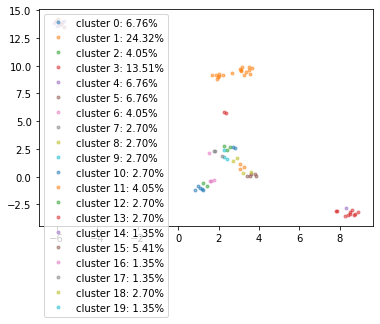

In [9]:
# Summary visual
visualize(tm)

Getting wordcloud for topic 0 ...
Getting wordcloud for topic 0. Done!
Getting wordcloud for topic 1 ...
Getting wordcloud for topic 1. Done!
Getting wordcloud for topic 2 ...
Getting wordcloud for topic 2. Done!
Getting wordcloud for topic 3 ...
Getting wordcloud for topic 3. Done!
Getting wordcloud for topic 4 ...
Getting wordcloud for topic 4. Done!
Getting wordcloud for topic 5 ...
Getting wordcloud for topic 5. Done!
Getting wordcloud for topic 6 ...
Getting wordcloud for topic 6. Done!
Getting wordcloud for topic 7 ...
Getting wordcloud for topic 7. Done!
Getting wordcloud for topic 8 ...
Getting wordcloud for topic 8. Done!
Getting wordcloud for topic 9 ...
Getting wordcloud for topic 9. Done!
Getting wordcloud for topic 10 ...
Getting wordcloud for topic 10. Done!
Getting wordcloud for topic 11 ...
Getting wordcloud for topic 11. Done!
Getting wordcloud for topic 12 ...
Getting wordcloud for topic 12. Done!
Getting wordcloud for topic 13 ...
Getting wordcloud for topic 13. Done

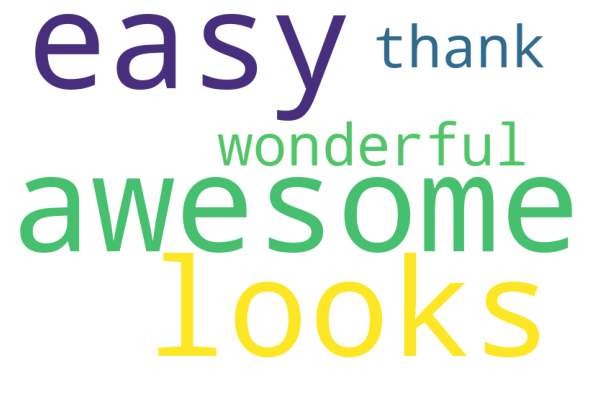

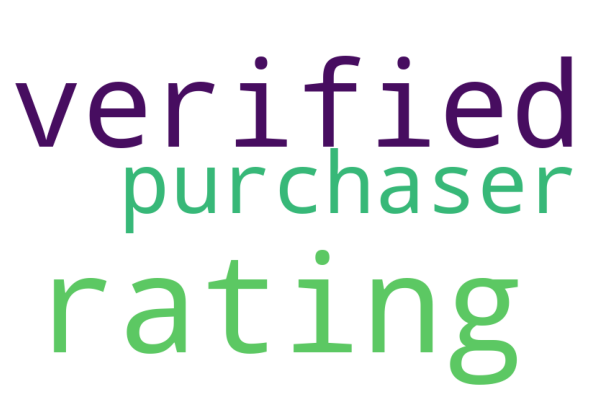

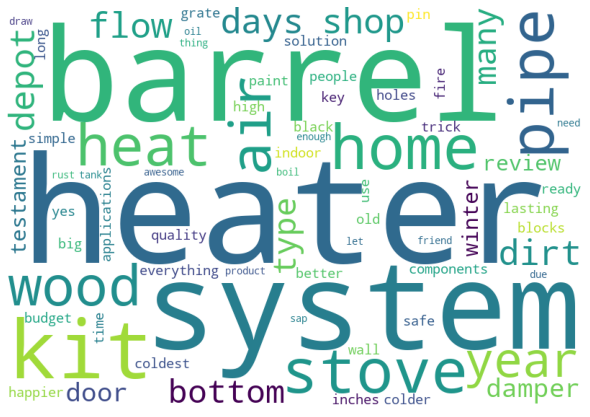

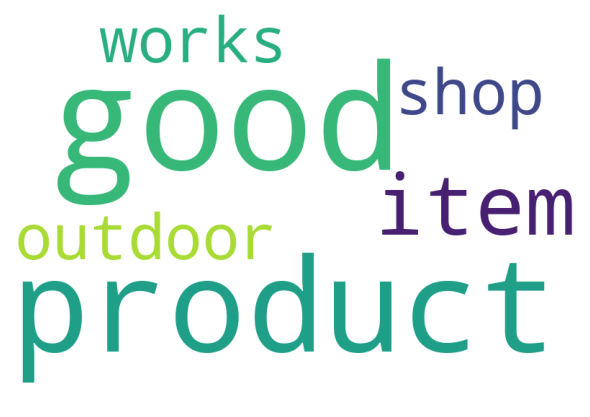

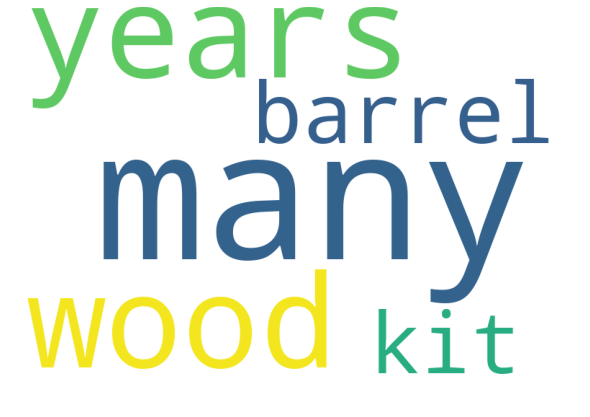

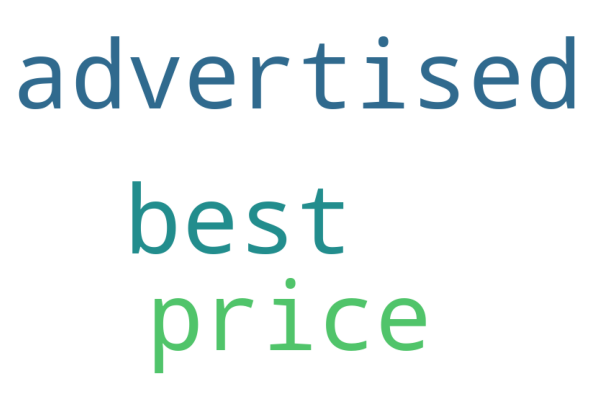

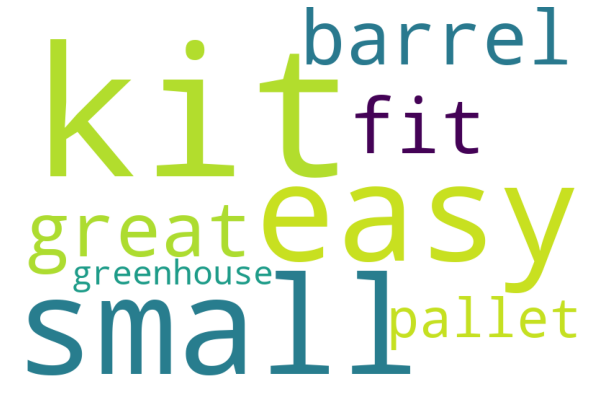

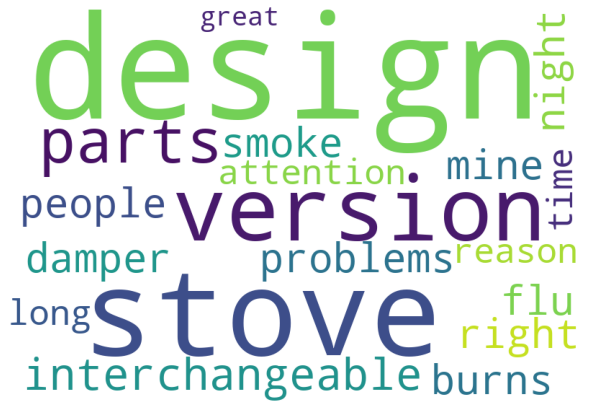

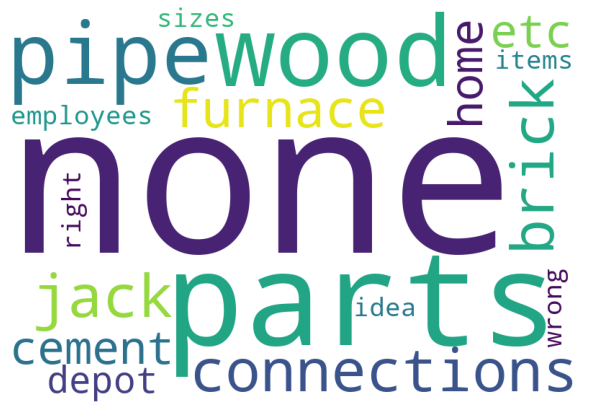

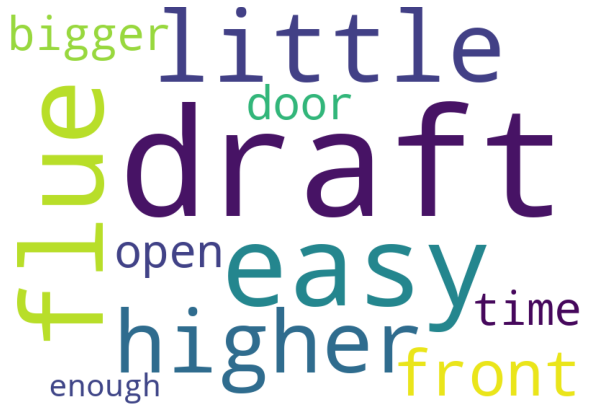

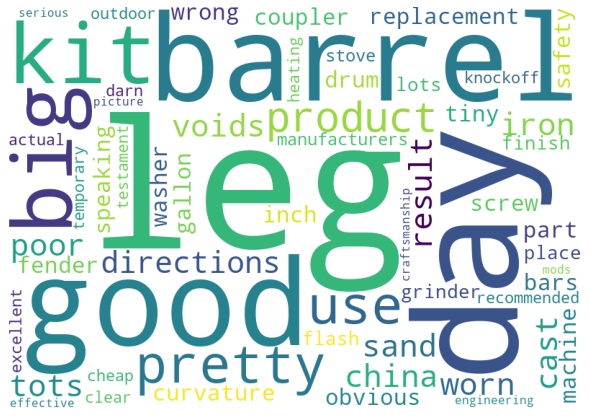

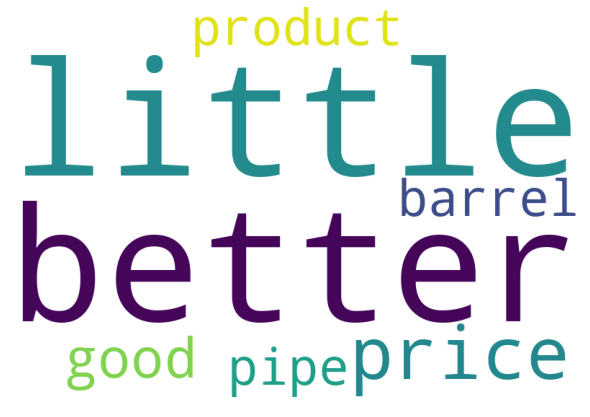

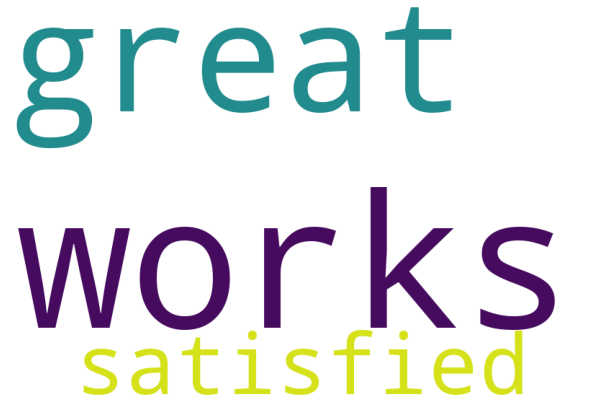

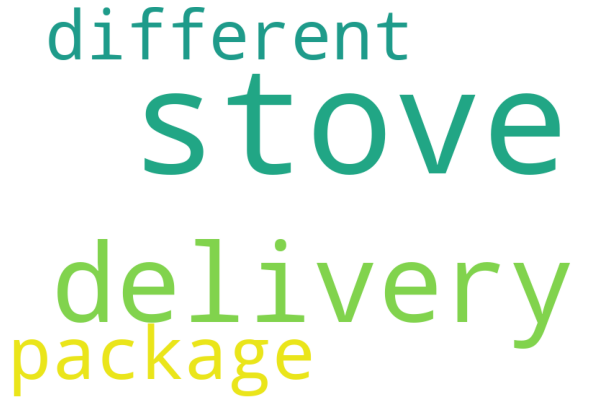

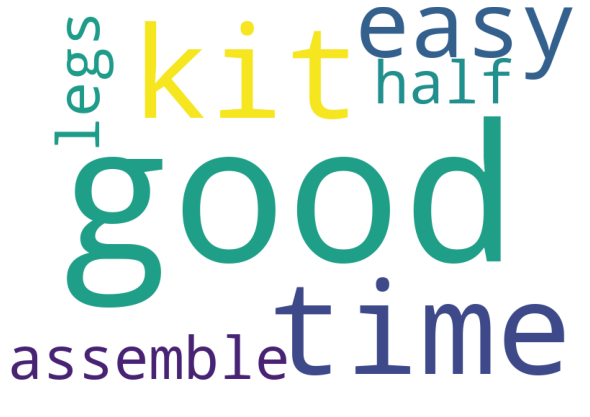

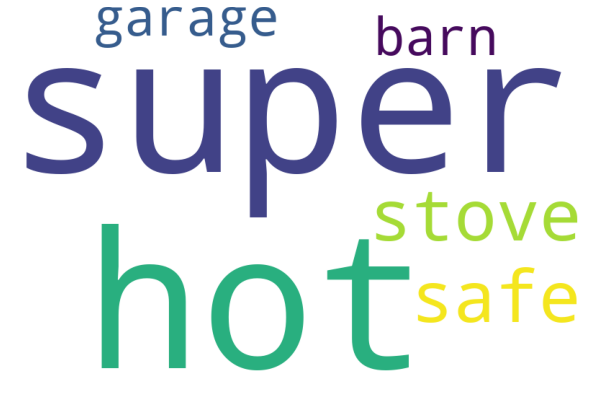

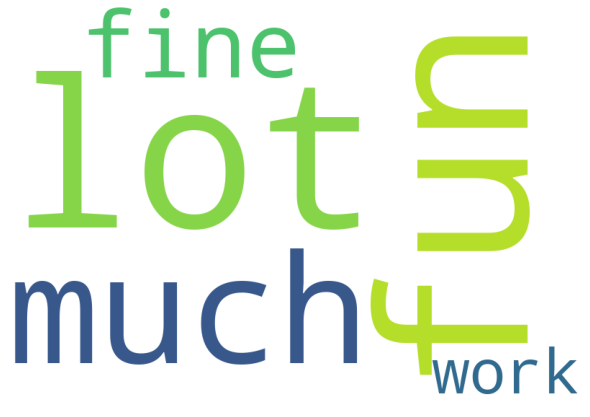

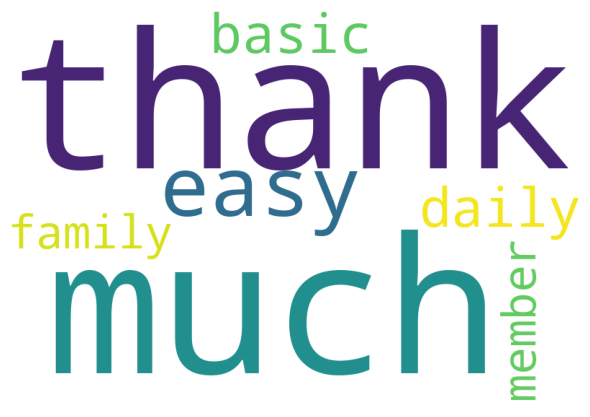

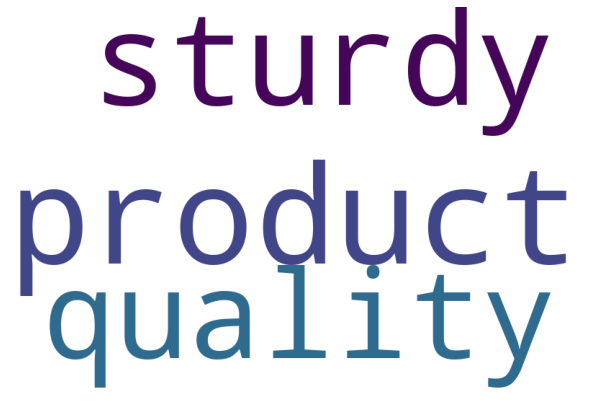

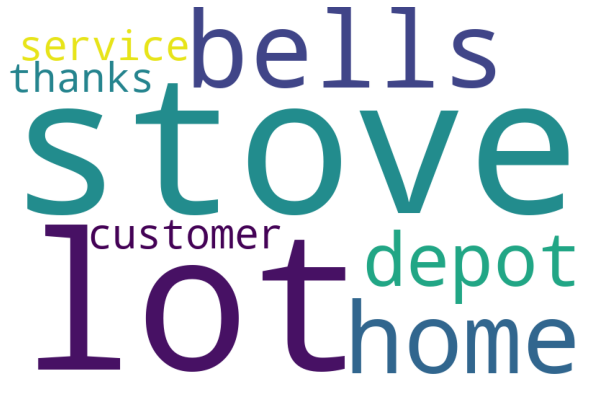

In [10]:
# Topic Visuals
for i in range(tm.k):
    get_wordcloud(tm, token_lists, i)